In [ ]:
!pip install ydata-profiling
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=05d4994fdd43ae9b0049b49c7bd4786f4b023afe70c06031332c550c3e2dc7fc
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


**Read Data**

In [ ]:
# Define the path to the folder and the file name
file_name = "./interview_analysis_molecule_x_10mg_v1.tsv"

# Combine folder and file name to create the full file path
file_path = os.path.join(file_name)

data = pd.read_csv(file_path, sep='\t', header=0)
data

,contract_id,published_date,start_date,duration_extension,outcome,second_place_outcome,buyer,region,atc,duration,...,maximum_price_allowed,active_ingredient,pack_strength,participants,participants_price,published_date_month,winner,winner_price,second_place,second_place_price
0,1,2013-05-16,2013-05-24,10,won,NaN,buyer_1,region_1,C07AB07,39,...,0.10000,molecule_x,10mg,participants_16,0.0004,2013-05-01,participants_16,0.00040,NaN,NaN
1,2,2013-04-29,2013-06-21,0,won,NaN,buyer_2,region_2,C07AB07,48,...,63442.21000,molecule_x,10mg,participants_16,0.007,2013-04-01,participants_16,0.00700,NaN,NaN
2,3,2013-06-09,2014-08-14,6,won,lost,buyer_3,region_3,C07AB07,12,...,0.11635,molecule_x,10mg,participants_16|participants_23,0.014|0.07071,2013-06-01,participants_16,0.01400,participants_23,0.070710
3,4,2013-05-04,2013-05-17,19,won,NaN,buyer_4,region_4,C07AB07,36,...,0.03000,molecule_x,10mg,participants_16,0.025,2013-05-01,participants_16,0.02500,NaN,NaN
4,5,2013-12-18,2013-12-17,6,won,NaN,buyer_5,region_5,C07AB07,36,...,0.00010,molecule_x,10mg,participants_16,1e-05,2013-12-01,participants_16,0.00001,NaN,NaN
5,6,2013-12-06,2014-02-21,14,won,NaN,buyer_6,region_6,C07AB07,48,...,0.02550,molecule_x,10mg,participants_16,0.019,2013-12-01,participants_16,0.01900,NaN,NaN
6,7,2014-02-24,2014-01-01,3,won,NaN,buyer_7,region_7,C07AB07,12,...,0.00005,molecule_x,10mg,participants_16,1e-05,2014-02-01,participants_16,0.00001,NaN,NaN
7,8,2014-03-08,2014-05-22,10,won,lost,buyer_8,region_8,C07AB07,36,...,0.08000,molecule_x,10mg,participants_16|participants_5|participants_6|...,0.03|0.08|0.034|0.04066,2014-03-01,participants_16,0.03000,participants_6,0.034000
8,9,2014-03-18,2014-05-30,6,won,NaN,buyer_9,region_9,C07AB07,24,...,0.00010,molecule_x,10mg,participants_16,1e-05,2014-03-01,participants_16,0.00001,NaN,NaN
9,10,2014-09-07,2014-08-31,7,won,NaN,buyer_10,region_10,C07AB07,36,...,0.00010,molecule_x,10mg,participants_16,0.0001,2014-09-01,participants_16,0.00010,NaN,NaN


**Exploratory Data Analysis**

In [ ]:
data.shape

(31, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   contract_id            31 non-null     int64  
 1   published_date         31 non-null     object 
 2   start_date             31 non-null     object 
 3   duration_extension     31 non-null     int64  
 4   outcome                31 non-null     object 
 5   second_place_outcome   15 non-null     object 
 6   buyer                  31 non-null     object 
 7   region                 31 non-null     object 
 8   atc                    30 non-null     object 
 9   duration               31 non-null     int64  
 10  contract_type          31 non-null     object 
 11  sku                    31 non-null     object 
 12  end_date_extension     31 non-null     object 
 13  participants_no        31 non-null     int64  
 14  quantity_annual        31 non-null     int64  
 15  quantity

In [ ]:
# check unique values
data.nunique()

contract_id              31
published_date           31
start_date               30
duration_extension       11
outcome                   2
second_place_outcome      2
buyer                    19
region                   16
atc                       1
duration                  6
contract_type             3
sku                       1
end_date_extension       28
participants_no           4
quantity_annual          29
quantity_total           31
maximum_price_allowed    22
active_ingredient         1
pack_strength             1
participants             13
participants_price       28
published_date_month     25
winner                    4
winner_price             25
second_place              7
second_place_price       13
dtype: int64

In [ ]:
data.describe()

,contract_id,duration_extension,duration,participants_no,quantity_annual,quantity_total,maximum_price_allowed,winner_price,second_place_price
count,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,31.000000,31.000000,15.000000
mean,16.000000,6.806452,33.419355,1.838710,36672.225806,1.209759e+05,54778.300158,0.016300,0.163316
std,9.092121,6.852831,11.552126,1.035914,76240.296491,2.703002e+05,206640.945411,0.011421,0.313966
min,1.000000,0.000000,12.000000,1.000000,1000.000000,2.680639e+03,0.000050,0.000010,0.015710
25%,8.500000,1.000000,24.000000,1.000000,3143.500000,8.929662e+03,0.018000,0.012250,0.034000
50%,16.000000,6.000000,36.000000,1.000000,15113.000000,3.296651e+04,0.030000,0.016990,0.042140
75%,23.500000,10.000000,37.500000,2.500000,26965.000000,6.622946e+04,0.086610,0.020000,0.066565
max,31.000000,26.000000,49.000000,4.000000,339387.000000,1.179787e+06,963542.280000,0.050000,0.999316


In [ ]:
# check missing values
data.isna().sum().sort_values()

contract_id               0
winner_price              0
winner                    0
published_date_month      0
participants_price        0
participants              0
pack_strength             0
active_ingredient         0
maximum_price_allowed     0
quantity_total            0
quantity_annual           0
participants_no           0
end_date_extension        0
sku                       0
contract_type             0
duration                  0
region                    0
buyer                     0
outcome                   0
duration_extension        0
start_date                0
published_date            0
atc                       1
second_place_outcome     16
second_place             16
second_place_price       16
dtype: int64

In [ ]:
# check duplicates
data.duplicated().sum()

0

**Data Understanding**

**contract_id** - unique identifiers for each contract. It's used to distinguish one contract from another in the dataset.

**participants_no:** The number of participants involved in the contract

**participants:** Names or identifiers of the participants involved in the contract

**participants_price:** The price associated with each participant

**winner:** The participant identified as the winner of the contract

**maximum_price_allowed:** The maximum price allowed for the contract

**winner_price:** The price offered by the winner

**published_date** - date when the contract was published.

**published_date_month** - the month when the contract was published. However, it seems to be redundant since published_date column already contains the exact information (and even more accurate) therefore I decided to drop this column.

**start_date** - indicates the start date of each contract.

**end_date_extension** - the original end date of the contract, which has been extended by a certain duration.

**duration_extension** - the duration of the extension of the contracts in months.

**duration** - the duration of the contract in months.


The plot below shows a diverse distribution of buyers, with some buyers being significantly more active or involved in more contracts than others.

<ipython-input-12-27271bf65308>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='buyer',data=data,palette='rocket_r',order=data['buyer'].value_counts().index)


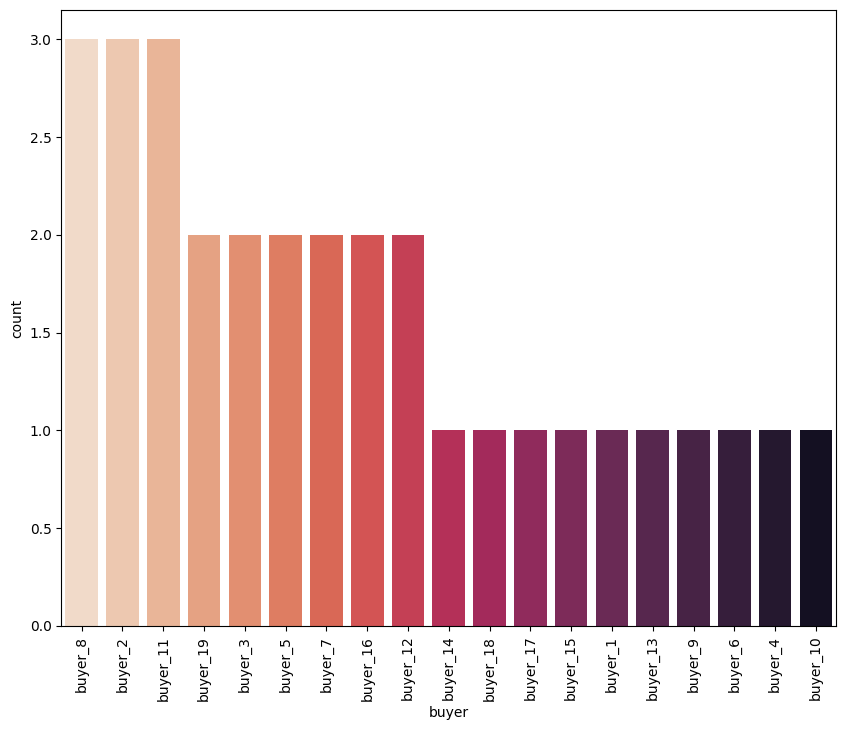

In [ ]:
# Plot distribution of buyers
plt.figure(figsize=(10,8))
sns.countplot(x='buyer',data=data,palette='rocket_r',order=data['buyer'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from scipy.stats import pearsonr

# Calculate buyer frequency
buyer_counts = data['buyer'].value_counts().reset_index()
buyer_counts.columns = ['buyer', 'buyer_count']

# Merge buyer frequency with the original data
data = data.merge(buyer_counts, on='buyer')

# Analyze Buyer Impact

# Correlation between buyer frequency and other variables
corr_winner_price = pearsonr(data['buyer_count'], data['winner_price'])
corr_quantity_total = pearsonr(data['buyer_count'], data['quantity_total'])

print(f"Correlation between buyer frequency and winner price: {corr_winner_price[0]:.2f} (p-value: {corr_winner_price[1]:.2f})")
print(f"Correlation between buyer frequency and quantity total: {corr_quantity_total[0]:.2f} (p-value: {corr_quantity_total[1]:.2f})")

# Descriptive statistics for winner_price and quantity_total grouped by buyers
grouped_stats = data.groupby('buyer')[['winner_price', 'quantity_total']].describe()
print(grouped_stats)



Correlation between buyer frequency and winner price: 0.22 (p-value: 0.24)
Correlation between buyer frequency and quantity total: 0.36 (p-value: 0.04)
         winner_price                                                   \
                count      mean       std      min       25%       50%   
buyer                                                                    
buyer_1           1.0  0.000400       NaN  0.00040  0.000400  0.000400   
buyer_10          1.0  0.000100       NaN  0.00010  0.000100  0.000100   
buyer_11          3.0  0.017570  0.000502  0.01699  0.017425  0.017860   
buyer_12          2.0  0.019000  0.001414  0.01800  0.018500  0.019000   
buyer_13          1.0  0.050000       NaN  0.05000  0.050000  0.050000   
buyer_14          1.0  0.017000       NaN  0.01700  0.017000  0.017000   
buyer_15          1.0  0.016070       NaN  0.01607  0.016070  0.016070   
buyer_16          2.0  0.018215  0.008082  0.01250  0.015357  0.018215   
buyer_17          1.0  0.012300   

**Correlation between Buyer Frequency and Winner Price:**
The positive correlation coefficient of 0.22 suggests a weak positive relationship between buyer frequency and winner price, meaning as buyer frequency increases, the winner price tends to slightly increase as well. However, the p-value of 0.24 indicates that this correlation is not statistically significant at common significance levels (e.g., 0.05), so this relationship could be due to random chance.

**Correlation between Buyer Frequency and Quantity Total:**
The positive correlation coefficient of 0.36 indicates a moderate positive relationship between buyer frequency and quantity total, meaning as buyer frequency increases, the total quantity tends to increase as well. The p-value of 0.04 indicates that this correlation is statistically significant at the 0.05 significance level, suggesting that this relationship is likely not due to random chance.

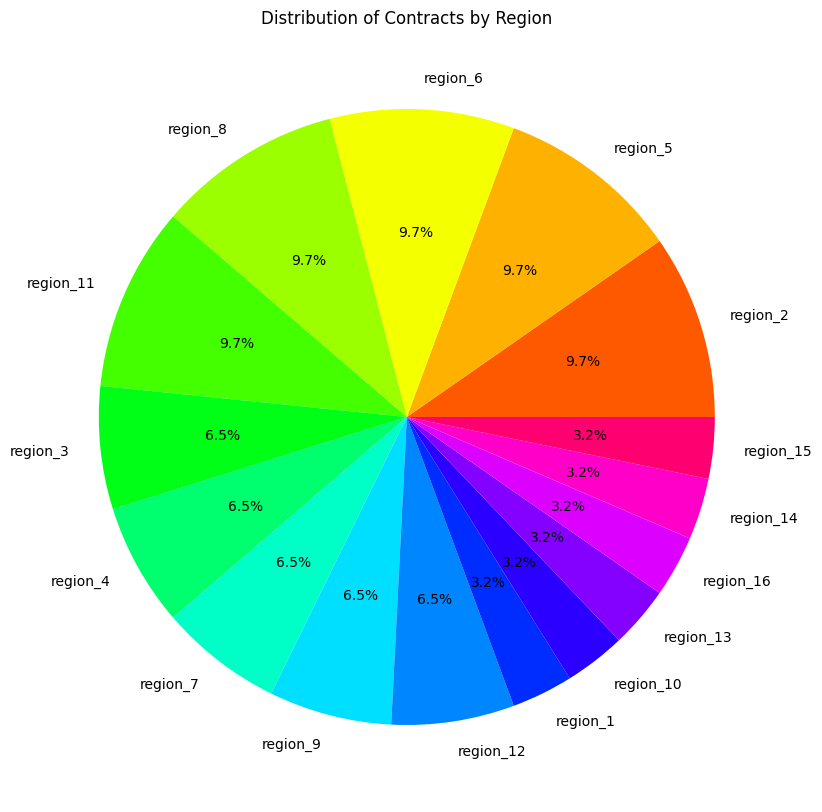

In [ ]:
# Plot distribution of Contracts by Region
plt.figure(figsize=(13, 10))
data['region'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('hsv', len(data['region'].unique())))
plt.ylabel('')  # Remove the y-label to clean up the plot
plt.title('Distribution of Contracts by Region')
plt.show()

The distribution shows a diverse spread of contracts across multiple regions, with a few regions having significantly higher representation.
Understanding these distributions can help in regional analysis and targeted strategies for areas with more contract activities.

<Axes: xlabel='winner', ylabel='count'>

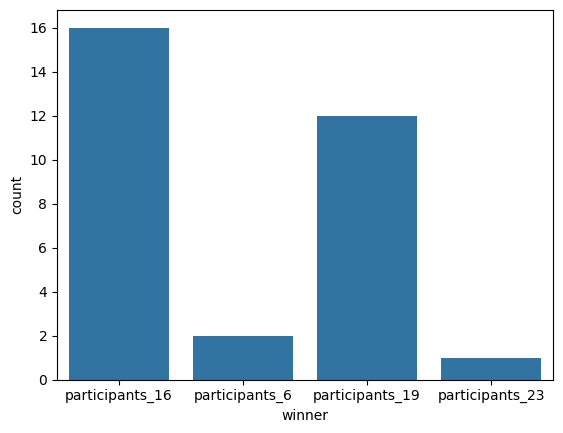

In [ ]:
# Plot distribution of winners
sns.countplot(x=data['winner'])

participants_16 is the most frequent winner, appearing 16 times in the dataset.

participants_19 is the second most frequent winner, appearing 12 times.

participants_6 and participants_23 have won significantly fewer contracts, appearing only 2 times and 1 time respectively.

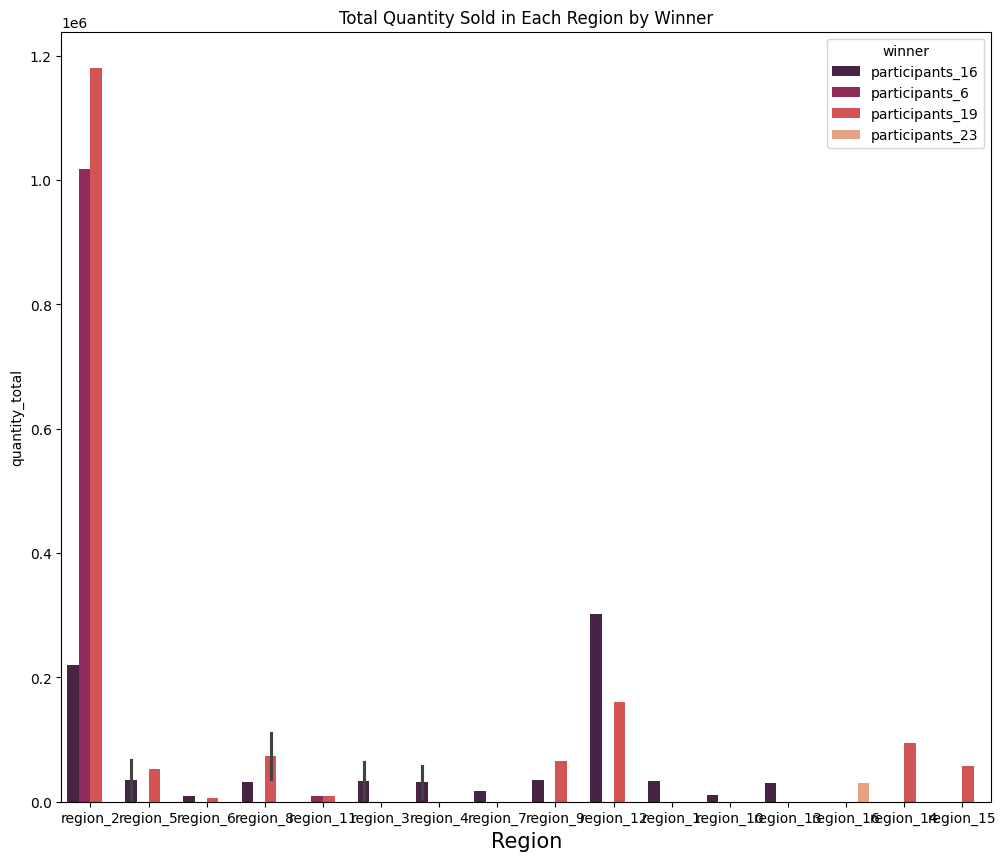

In [ ]:
# Plot Total Quantity Sold in Each Region by Winner
plt.figure(figsize=(12,10))
plt.title('Total Quantity Sold in Each Region by Winner')
sns.barplot(x='region',y='quantity_total',data=data,hue='winner',order=data['region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

This plot shows the distribution of total quantities sold across different regions and how it varies among different winners.

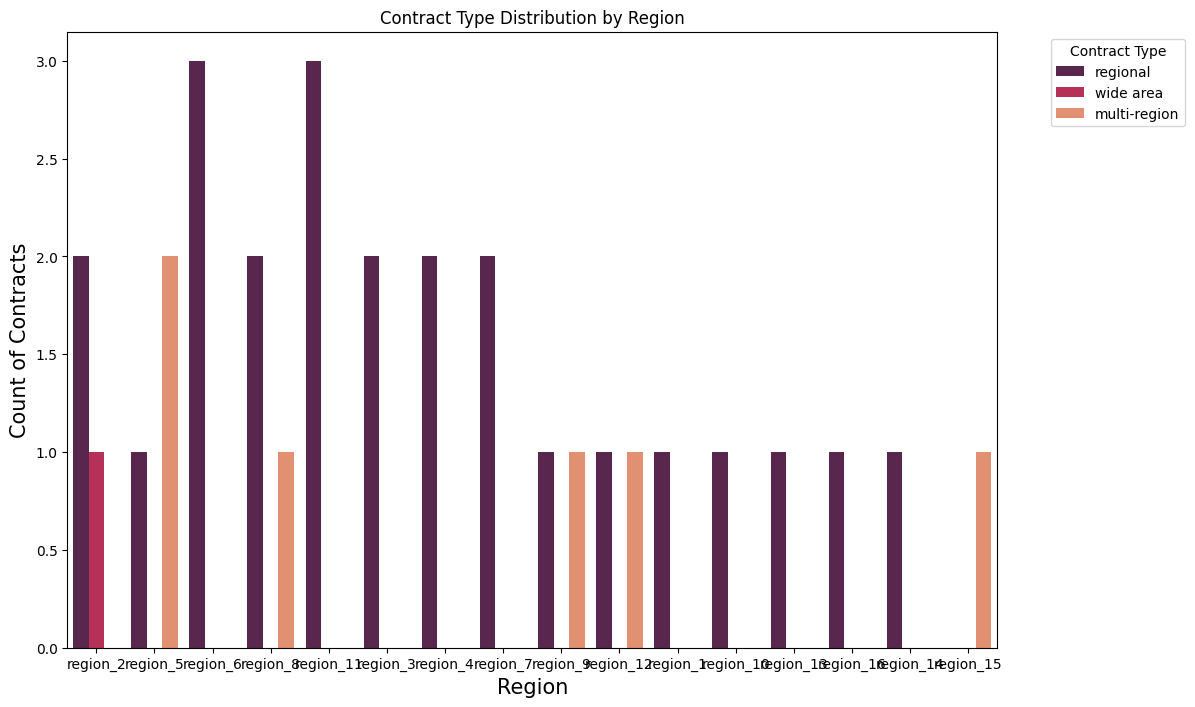

In [ ]:
# Plot contract type distribution by region
plt.figure(figsize=(12, 8))
sns.countplot(x='region', hue='contract_type', data=data, order=data['region'].value_counts().index, palette='rocket')
plt.title('Contract Type Distribution by Region')
plt.xlabel('Region', fontsize=15)
plt.ylabel('Count of Contracts', fontsize=15)
plt.legend(title='Contract Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The above plot shows the distribution of different contract types across various regions. This visualization helps to understand how different regions prefer different contract types helping to identify any regional preferences or patterns in contract types.

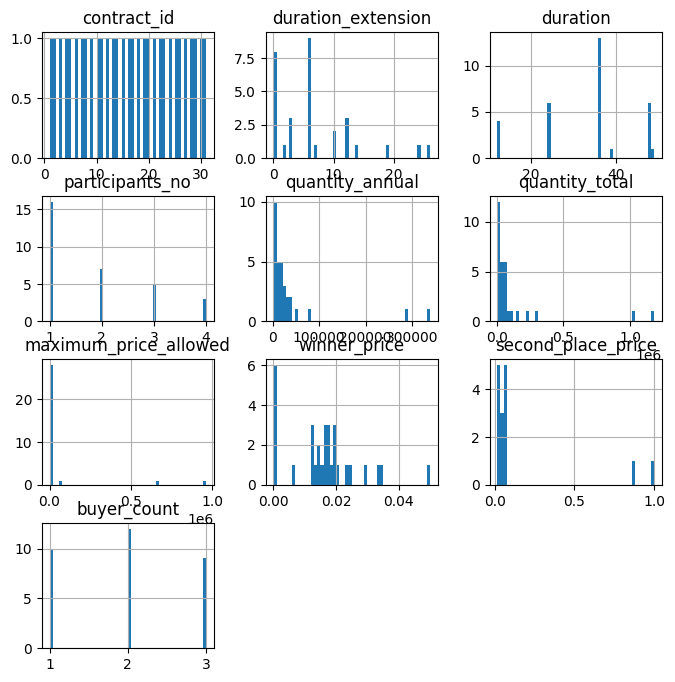

In [ ]:
# Plot the distribution of each numerical variable
data.hist(figsize=(8,8),bins=50)
plt.show()

Visualizing the distribution of each numerical variable helps to understand the distribution of data, identifying skewness, and the presence of outliers.

**Data Preprocessing**

In [ ]:
# Convert date columns to datetime type
date_cols = ['published_date', 'start_date', 'end_date_extension', 'published_date_month']
for col in date_cols:
    data[col] = pd.to_datetime(data[col])

# Convert quantity_total to integer after rounding to three decimal places
data['quantity_total'] = data['quantity_total'].round(3).astype(int)



*Analyzing the target variable*

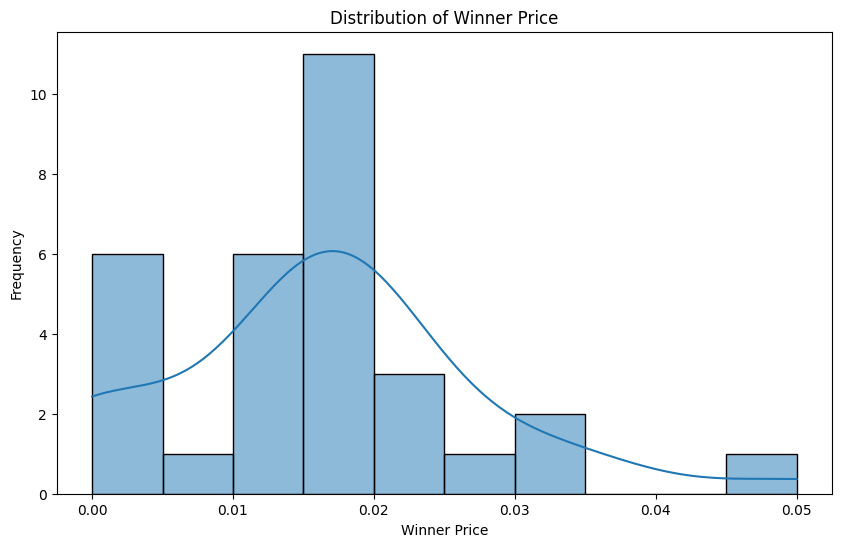

In [ ]:
# Plot distribution of winner_price
plt.figure(figsize=(10, 6))
sns.histplot(data['winner_price'], bins=10, kde=True)
plt.title('Distribution of Winner Price')
plt.xlabel('Winner Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data['winner_price'].describe()

count    31.000000
mean      0.016300
std       0.011421
min       0.000010
25%       0.012250
50%       0.016990
75%       0.020000
max       0.050000
Name: winner_price, dtype: float64

In [ ]:
# Detect and handle outliers using Z-score
from scipy import stats

z_scores = np.abs(stats.zscore(data['winner_price']))
outliers_zscore = data[(z_scores > 3)]
outliers_zscore

,contract_id,published_date,start_date,duration_extension,outcome,second_place_outcome,buyer,region,atc,duration,...,active_ingredient,pack_strength,participants,participants_price,published_date_month,winner,winner_price,second_place,second_place_price,buyer_count


In [ ]:
# Use IQR to detect outliers
Q1 = data['winner_price'].quantile(0.25)
Q3 = data['winner_price'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = data[((data['winner_price'] < (Q1 - 1.5 * IQR)) | (data['winner_price'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Remove outliers identified by the IQR method
data = data[~((data['winner_price'] < (Q1 - 1.5 * IQR)) | (data['winner_price'] > (Q3 + 1.5 * IQR)))]

# Summary statistics for winner_price after removing IQR outliers
cleaned_winner_price_summary_iqr = data['winner_price'].describe()
cleaned_winner_price_summary_iqr

count    22.000000
mean      0.017532
std       0.004909
min       0.007000
25%       0.015000
50%       0.017430
75%       0.020000
max       0.030000
Name: winner_price, dtype: float64

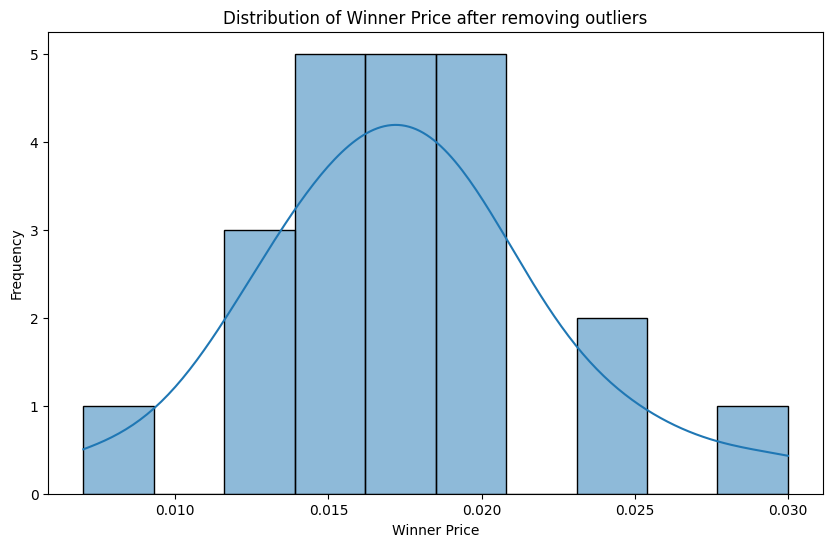

In [ ]:
# Plot distribution of winner_price after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(data['winner_price'], bins=10, kde=True)
plt.title('Distribution of Winner Price after removing outliers')
plt.xlabel('Winner Price')
plt.ylabel('Frequency')
plt.show()

*Outlier Detection and Removal* :

I used the statistical methods Z-score and IQR to detect and handle outliers. Based on the Z-score Method, no outliers were detected (all Z-scores <= 3).Based on IQR Method, 9 potential outliers were identified. I decided to remove the outliers identified by the IQR method because they deemed invalid or anomalous.


*Comparison Before and After Cleaning* :

The overall distribution appears more consistent and robust for use as a target variable in a machine learning model.

No negative prices found in the dataset.
No missing values in the winner_price column.
I ensured that the winner_price column contains only numerical values.

 *Check if the target variable "**winner_price**" is indeed the mininum one by comparing the values from "**minimum participants_price**"*

In [ ]:
# Compare "winner_price" to minimum participants_price


# Function to get the minimum participant price
def get_min_participant_price(prices):
    price_list = [float(price) for price in prices.split('|')]
    return min(price_list)

# Apply the function to calculate the minimum price for each row
data['min_participant_price'] = data['participants_price'].apply(lambda x: get_min_participant_price(x) if pd.notnull(x) else None)

# Compare winner_price with min_participant_price
data['price_match'] = data.apply(lambda row: row['winner_price'] == row['min_participant_price'] if pd.notnull(row['min_participant_price']) else False, axis=1)

# Identify discrepancies
discrepancies = data[~data['price_match']]

# Show summary of discrepancies
discrepancies_summary = discrepancies[['contract_id', 'winner_price', 'participants_price', 'min_participant_price']]

# Save discrepancies to a new file for review
discrepancies_summary.to_csv('discrepancies_summary.tsv', sep='\t', index=False)


print(discrepancies_summary)

# Findings summary
total_rows = data.shape[0]
discrepant_rows = discrepancies.shape[0]
discrepant_percentage = (discrepant_rows / total_rows) * 100

print(f'Total Rows: {total_rows}')
print(f'Discrepant Rows: {discrepant_rows}')
print(f'Discrepant Percentage: {discrepant_percentage:.2f}%')

Empty DataFrame
Columns: [contract_id, winner_price, participants_price, min_participant_price]
Index: []
Total Rows: 22
Discrepant Rows: 0
Discrepant Percentage: 0.00%


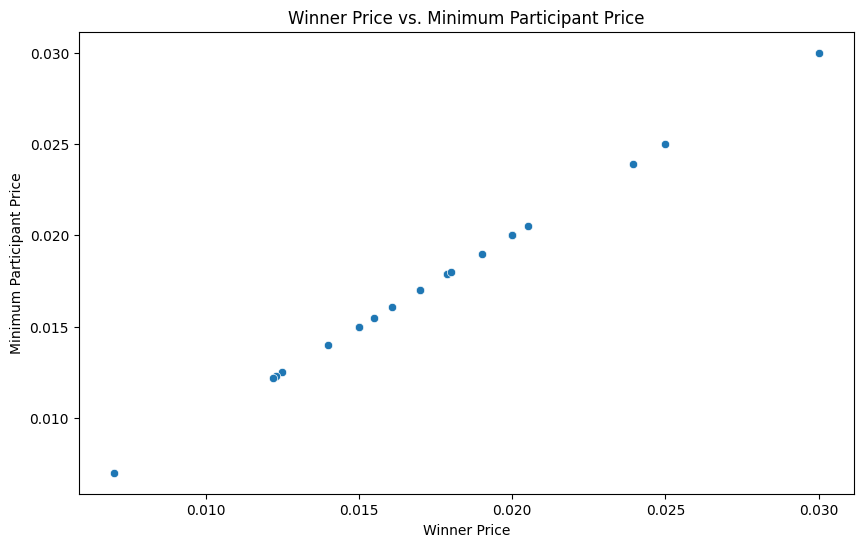

In [ ]:
# Visualize discrepancies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='winner_price', y='min_participant_price', data=data)
plt.title('Winner Price vs. Minimum Participant Price')
plt.xlabel('Winner Price')
plt.ylabel('Minimum Participant Price')
plt.show()


The winner_price column is equal to the minimum price offered in the participants_price column.

*Column Cleaning*

In [ ]:
data[['contract_id','participants_no','participants', 'participants_price','winner', 'maximum_price_allowed','winner_price']]

,contract_id,participants_no,participants,participants_price,winner,maximum_price_allowed,winner_price
1,2,1,participants_16,0.007,participants_16,63442.21000,0.00700
3,24,2,participants_19|participants_23,0.0205|0.03929,participants_19,963542.28000,0.02050
4,3,2,participants_16|participants_23,0.014|0.07071,participants_16,0.11635,0.01400
5,18,2,participants_16|participants_19,0.02|0.8665684755636098,participants_16,0.02200,0.02000
6,4,1,participants_16,0.025,participants_16,0.03000,0.02500
8,17,2,participants_16|participants_7,0.02|0.9993156095718888,participants_16,0.02000,0.02000
9,6,1,participants_16,0.019,participants_16,0.02550,0.01900
12,8,4,participants_16|participants_5|participants_6|...,0.03|0.08|0.034|0.04066,participants_16,0.08000,0.03000
14,31,4,participants_19|participants_7|participants_16...,0.0155|0.06256|0.08|0.09286,participants_19,0.09322,0.01550
17,13,4,participants_6|participants_16|participants_23...,0.01699|0.07|0.06802|0.075,participants_6,0.07971,0.01699


After I checked that the **winner_price** column is equal to the minimum price offered in the **participants_price** column, I decided to drop the **participants** and the **participants_price** columns since I don't need them anymore. This way I reduce the dataset dimensionality because we don't need redundant data. However, we could also keep the **participants_price** column for further analysis to better understanding the pricing associated with each participant for analysis of bidding behavior and pricing strategies. Analyzing this variable could reveal trends in pricing across different participants or contracts.

Also, I have decided to drop the **second_place_outcome**, **second_place**, and **second_place_price** columns as they have 15 missing values from a total of 30. This also reduces the dataset dimensionality.

Columns with constant values, such as: '**atc**', '**sku**', '**active_ingredient**' and '**pack_strength**' have been dropped as well. If a variable has only one unique value (i.e., a constant value), it does not provide any variability in the data and therefore does not contribute to the analysis.


In [ ]:
# Drop the unnecessary columns
unnecessary_columns = ['participants', 'participants_price','second_place_outcome', 'second_place', 'second_place_price','min_participant_price', 'buyer_count']
data = data.drop(columns=unnecessary_columns)

In [ ]:
# Identify and drop constant columns
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
data = data.drop(columns=constant_columns)
print(data.shape)

(22, 17)


*Analyzing the maximum_price_allowed column*

In [ ]:
data['maximum_price_allowed']

1      63442.21000
3     963542.28000
4          0.11635
5          0.02200
6          0.03000
8          0.02000
9          0.02550
12         0.08000
14         0.09322
17         0.07971
18         0.07971
19         0.07971
20      6647.87200
21         0.02001
23         0.02500
24         0.02200
25         0.02000
26         0.03929
27         0.01250
28         0.01250
29         0.01600
30         0.03000
Name: maximum_price_allowed, dtype: float64

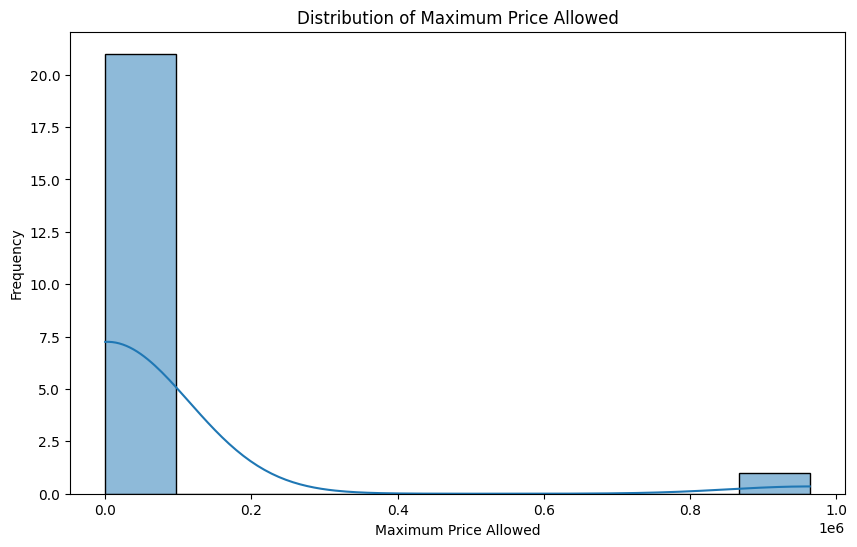

In [ ]:
# Plot distribution of Maximum Price Allowed
plt.figure(figsize=(10, 6))
sns.histplot(data['maximum_price_allowed'], bins=10, kde=True)
plt.title('Distribution of Maximum Price Allowed')
plt.xlabel('Maximum Price Allowed')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data['maximum_price_allowed'].describe()

count        22.000000
mean      46983.326614
std      205161.876623
min           0.012500
25%           0.020507
50%           0.030000
75%           0.079927
max      963542.280000
Name: maximum_price_allowed, dtype: float64

The column '**maximum_price_allowed**' has outlier values, I have decided to drop the values higher than the 90th percentile as those values differ a lot. However, it is worth mentioning that with only 22 samples and 3 outliers, removing outliers can significantly impact statistical measures such as means, standard deviations, and correlations.


In [ ]:
threshold = data['maximum_price_allowed'].quantile(0.9)

print("The 90th percentile value is:", threshold)

# Filter out rows where column1 exceeds the 90th percentile threshold
data = data[data['maximum_price_allowed'] < threshold]


The 90th percentile value is: 5983.096435000014


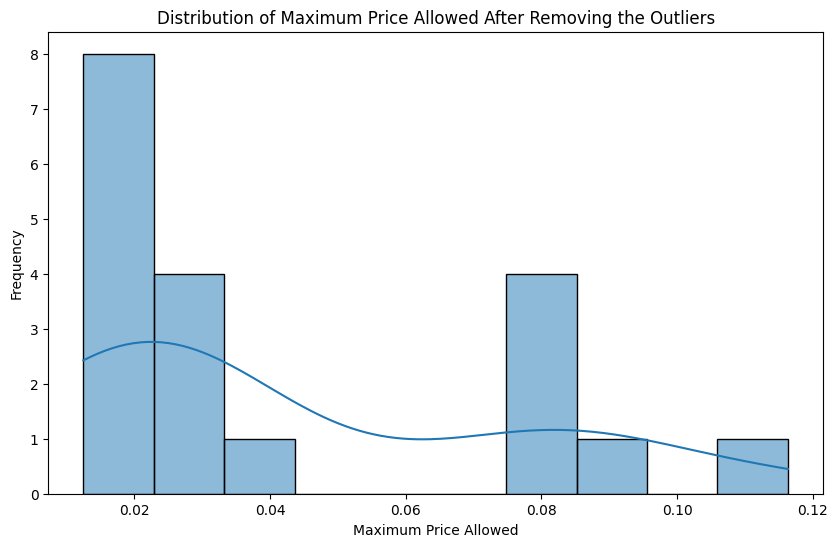

In [ ]:
# Plot distribution of Maximum Price Allowed after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(data['maximum_price_allowed'], bins=10, kde=True)
plt.title('Distribution of Maximum Price Allowed After Removing the Outliers')
plt.xlabel('Maximum Price Allowed')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data.shape

(19, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 4 to 30
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   contract_id            19 non-null     int64         
 1   published_date         19 non-null     datetime64[ns]
 2   start_date             19 non-null     datetime64[ns]
 3   duration_extension     19 non-null     int64         
 4   outcome                19 non-null     object        
 5   buyer                  19 non-null     object        
 6   region                 19 non-null     object        
 7   duration               19 non-null     int64         
 8   contract_type          19 non-null     object        
 9   end_date_extension     19 non-null     datetime64[ns]
 10  participants_no        19 non-null     int64         
 11  quantity_annual        19 non-null     int64         
 12  quantity_total         19 non-null     int64         
 13  maximum_pric

*Analyzing the timeline, duration, and any extensions of the contracts.*

In [ ]:
data[['contract_id','published_date', 'published_date_month', 'start_date', 'end_date_extension', 'duration_extension', 'duration']]

,contract_id,published_date,published_date_month,start_date,end_date_extension,duration_extension,duration
4,3,2013-06-09,2013-06-01,2014-08-14,2016-02-14,6,12
5,18,2019-05-26,2019-05-01,2019-07-02,2023-01-01,6,36
6,4,2013-05-04,2013-05-01,2013-05-17,2017-12-31,19,36
8,17,2018-05-31,2018-05-01,2018-04-01,2020-05-31,2,24
9,6,2013-12-06,2013-12-01,2014-02-21,2019-04-20,14,48
12,8,2014-03-08,2014-03-01,2014-05-22,2018-03-22,10,36
14,31,2023-10-24,2023-10-01,2023-09-26,2027-03-30,6,36
17,13,2016-04-13,2016-04-01,2016-06-25,2019-12-24,6,36
18,19,2020-01-01,2020-01-01,2020-08-04,2023-08-03,0,36
19,20,2019-12-19,2019-12-01,2020-08-04,2023-08-03,0,36


In [ ]:
# Calculate the total duration and the difference in months
data['months_between_start_and_extended_date'] = (data['end_date_extension'] - data['start_date']).dt.days // 30
data['total_duration'] = data['duration_extension'] + data['duration']
data['difference'] = data['months_between_start_and_extended_date'] - data['total_duration']


data[['contract_id','published_date', 'published_date_month', 'start_date', 'end_date_extension', 'duration_extension', 'duration', 'months_between_start_and_extended_date','total_duration', 'difference']]


,contract_id,published_date,published_date_month,start_date,end_date_extension,duration_extension,duration,months_between_start_and_extended_date,total_duration,difference
4,3,2013-06-09,2013-06-01,2014-08-14,2016-02-14,6,12,18,18,0
5,18,2019-05-26,2019-05-01,2019-07-02,2023-01-01,6,36,42,42,0
6,4,2013-05-04,2013-05-01,2013-05-17,2017-12-31,19,36,56,55,1
8,17,2018-05-31,2018-05-01,2018-04-01,2020-05-31,2,24,26,26,0
9,6,2013-12-06,2013-12-01,2014-02-21,2019-04-20,14,48,62,62,0
12,8,2014-03-08,2014-03-01,2014-05-22,2018-03-22,10,36,46,46,0
14,31,2023-10-24,2023-10-01,2023-09-26,2027-03-30,6,36,42,42,0
17,13,2016-04-13,2016-04-01,2016-06-25,2019-12-24,6,36,42,42,0
18,19,2020-01-01,2020-01-01,2020-08-04,2023-08-03,0,36,36,36,0
19,20,2019-12-19,2019-12-01,2020-08-04,2023-08-03,0,36,36,36,0


With this analysis I wanted to extract the **total_duration** of a contract measured in months. For this I used **start_date** and **end_date_extention** columns. Also, I used the **total_duration** metric to check the correcntess of the **duration** and **duration_extention** columns and see if there is any errors associated with the dates and/or the duration columns. No problems regarding this were found in the dataset.

In [ ]:
# Find rows where published_date is after start_date
invalid_dates = data[data['published_date'] > data['start_date']]

# Display invalid rows
print("\nRows where published_date is after start_date:")
print(invalid_dates)


Rows where published_date is after start_date:
    contract_id published_date start_date  duration_extension outcome  \
8            17     2018-05-31 2018-04-01                   2     won   
14           31     2023-10-24 2023-09-26                   6     won   
21           26     2021-07-09 2021-07-05                   6     won   
25           22     2020-06-10 2020-04-29                   6     won   
26           29     2022-07-01 2022-06-17                  24    lost   
27           25     2021-06-09 2021-05-20                   0     won   

       buyer     region  duration contract_type end_date_extension  \
8    buyer_5   region_5        24  multi-region         2020-05-31   
14   buyer_8   region_8        36      regional         2027-03-30   
21  buyer_12  region_12        48      regional         2026-01-05   
25  buyer_16   region_5        24  multi-region         2022-09-30   
26  buyer_16  region_16        24      regional         2026-06-16   
27  buyer_17  region

With this analysis I wanted to check if **published_date** happened before the **start_date** of the contract, as this seems logicall and natural to me. However, I identified 6 cases when **published_date** is after **start_date**.

Observations where the **published_date** falls after the **start_date** could potentially indicate inconsistencies within the dataset. Generally, I expect the **published_date** to be before the **start_date** in contract records. This misalignment might stem due to data entry errors.

I chose not to drop these rows because I'm uncertain whether these instances represent errors. I'll need further expertise and clarification on these variables to determine if they are indeed connected and if any discrepancies are present.

Based on the analysis above, it seems that **published_date_month** can be dropped. This column seem redundant, as it is derived from **published_date** and may not offer additional information beyond what's already captured in **published_date**.

In [ ]:
col_to_be_dropped = ['published_date_month','months_between_start_and_extended_date', 'difference', 'total_duration' ]
data = data.drop(columns=col_to_be_dropped)

*Analysing the columns "quantity_annual" and the "quantity_total"*

In [ ]:
data[['quantity_annual', 'quantity_total']]

,quantity_annual,quantity_total
4,1904,2680
5,20993,63904
6,1652,5900
8,32875,66527
9,2088,9026
12,10332,31951
14,36360,109912
17,2800,8589
18,2680,8426
19,2680,8833


In [ ]:
print("Describe quantity_annual:")
print(data['quantity_annual'].describe())

print("\nDescribe quantity_total:")
print(data['quantity_total'].describe())

Describe quantity_annual:
count       19.000000
mean     15355.631579
std      13073.629489
min       1652.000000
25%       2740.000000
50%      14476.000000
75%      24719.000000
max      40014.000000
Name: quantity_annual, dtype: float64

Describe quantity_total:
count        19.000000
mean      44551.894737
std       43314.173408
min        2680.000000
25%        8507.500000
50%       31951.000000
75%       64917.500000
max      160968.000000
Name: quantity_total, dtype: float64


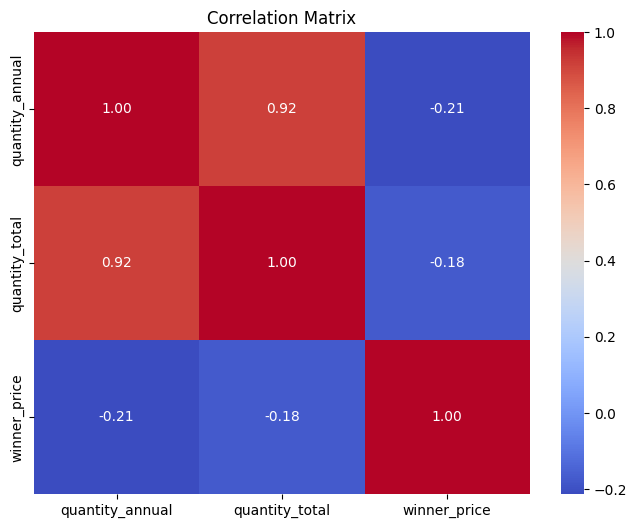

In [ ]:
# Calculate correlation matrix
corr_matrix = data[['quantity_annual', 'quantity_total', 'winner_price']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

*High Correlation between **quantity_annual**  and **quantity_total** :

The correlation coefficient between **quantity_annual** and **quantity_total** is 0.92, indicating a strong positive correlation. This suggests that these two variables are highly related and one can be used to infer the other.

*Moderate Negative Correlation with **winner_price**:*

Both **quantity_annual** and **quantity_total** have moderate negative correlations with **winner_price**, with coefficients of -0.21 and -0.18 respectively. This suggests that as the quantity increases, the **winner_price** tends to decrease slightly, which could be due to economies of scale or competitive pricing for larger quantities.

*Suggestions Based on the Correlation Matrix*:

Given the high correlation between **quantity_annual** and **quantity_total**, it might be redundant to keep both columns in the dataset. Since **quantity_total** represents the total quantity over the entire contract duration, it might be more informative in the context of contract analysis. Therefore, I decided to drop **quantity_annual**.


High correlation between **quantity_annual** and **quantity_total** is not unexpected, and **quantity_total** is an acqumulative metric including the quantity annual.

I believe **quantity_total** provides comprehensive information about the total quantity throughout the contract duration, and considering the uncertainty surrounding the interpretation of **quantity_annual**, I decided to drop the **quantity_annual** variable from further analysis. By doing so, we focus on the most informative variables thereby enhancing the clarity and robustness of our analysis.

In [ ]:
data = data.drop(columns = 'quantity_annual')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 4 to 30
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   contract_id            19 non-null     int64         
 1   published_date         19 non-null     datetime64[ns]
 2   start_date             19 non-null     datetime64[ns]
 3   duration_extension     19 non-null     int64         
 4   outcome                19 non-null     object        
 5   buyer                  19 non-null     object        
 6   region                 19 non-null     object        
 7   duration               19 non-null     int64         
 8   contract_type          19 non-null     object        
 9   end_date_extension     19 non-null     datetime64[ns]
 10  participants_no        19 non-null     int64         
 11  quantity_total         19 non-null     int64         
 12  maximum_price_allowed  19 non-null     float64       
 13  winner      

In [ ]:
data

,contract_id,published_date,start_date,duration_extension,outcome,buyer,region,duration,contract_type,end_date_extension,participants_no,quantity_total,maximum_price_allowed,winner,winner_price
4,3,2013-06-09,2014-08-14,6,won,buyer_3,region_3,12,regional,2016-02-14,2,2680,0.11635,participants_16,0.01400
5,18,2019-05-26,2019-07-02,6,won,buyer_3,region_3,36,regional,2023-01-01,2,63904,0.02200,participants_16,0.02000
6,4,2013-05-04,2013-05-17,19,won,buyer_4,region_4,36,regional,2017-12-31,1,5900,0.03000,participants_16,0.02500
8,17,2018-05-31,2018-04-01,2,won,buyer_5,region_5,24,multi-region,2020-05-31,2,66527,0.02000,participants_16,0.02000
9,6,2013-12-06,2014-02-21,14,won,buyer_6,region_6,48,regional,2019-04-20,1,9026,0.02550,participants_16,0.01900
12,8,2014-03-08,2014-05-22,10,won,buyer_8,region_8,36,regional,2018-03-22,4,31951,0.08000,participants_16,0.03000
14,31,2023-10-24,2023-09-26,6,won,buyer_8,region_8,36,regional,2027-03-30,4,109912,0.09322,participants_19,0.01550
17,13,2016-04-13,2016-06-25,6,won,buyer_11,region_11,36,regional,2019-12-24,4,8589,0.07971,participants_6,0.01699
18,19,2020-01-01,2020-08-04,0,won,buyer_11,region_11,36,regional,2023-08-03,3,8426,0.07971,participants_19,0.01786
19,20,2019-12-19,2020-08-04,0,won,buyer_11,region_11,36,regional,2023-08-03,3,8833,0.07971,participants_19,0.01786


**Encoding the Dataset**

Encoding the dataset is essential to convert categorical variables into a numerical format, enabling machine learning algorithms to process and learn from the data effectively. This transformation helps in improving model performance and accuracy.

   contract_id published_date start_date  duration_extension  outcome  buyer  \
4            3     2013-06-09 2014-08-14                   6        1      8   
5           18     2019-05-26 2019-07-02                   6        1      8   
6            4     2013-05-04 2013-05-17                  19        1      9   
8           17     2018-05-31 2018-04-01                   2        1     10   
9            6     2013-12-06 2014-02-21                  14        1     11   

   region  duration  contract_type end_date_extension  participants_no  \
4       5        12              1         2016-02-14                2   
5       5        36              1         2023-01-01                2   
6       6        36              1         2017-12-31                1   
8       7        24              0         2020-05-31                2   
9       8        48              1         2019-04-20                1   

   quantity_total  maximum_price_allowed  winner  winner_price  
4        

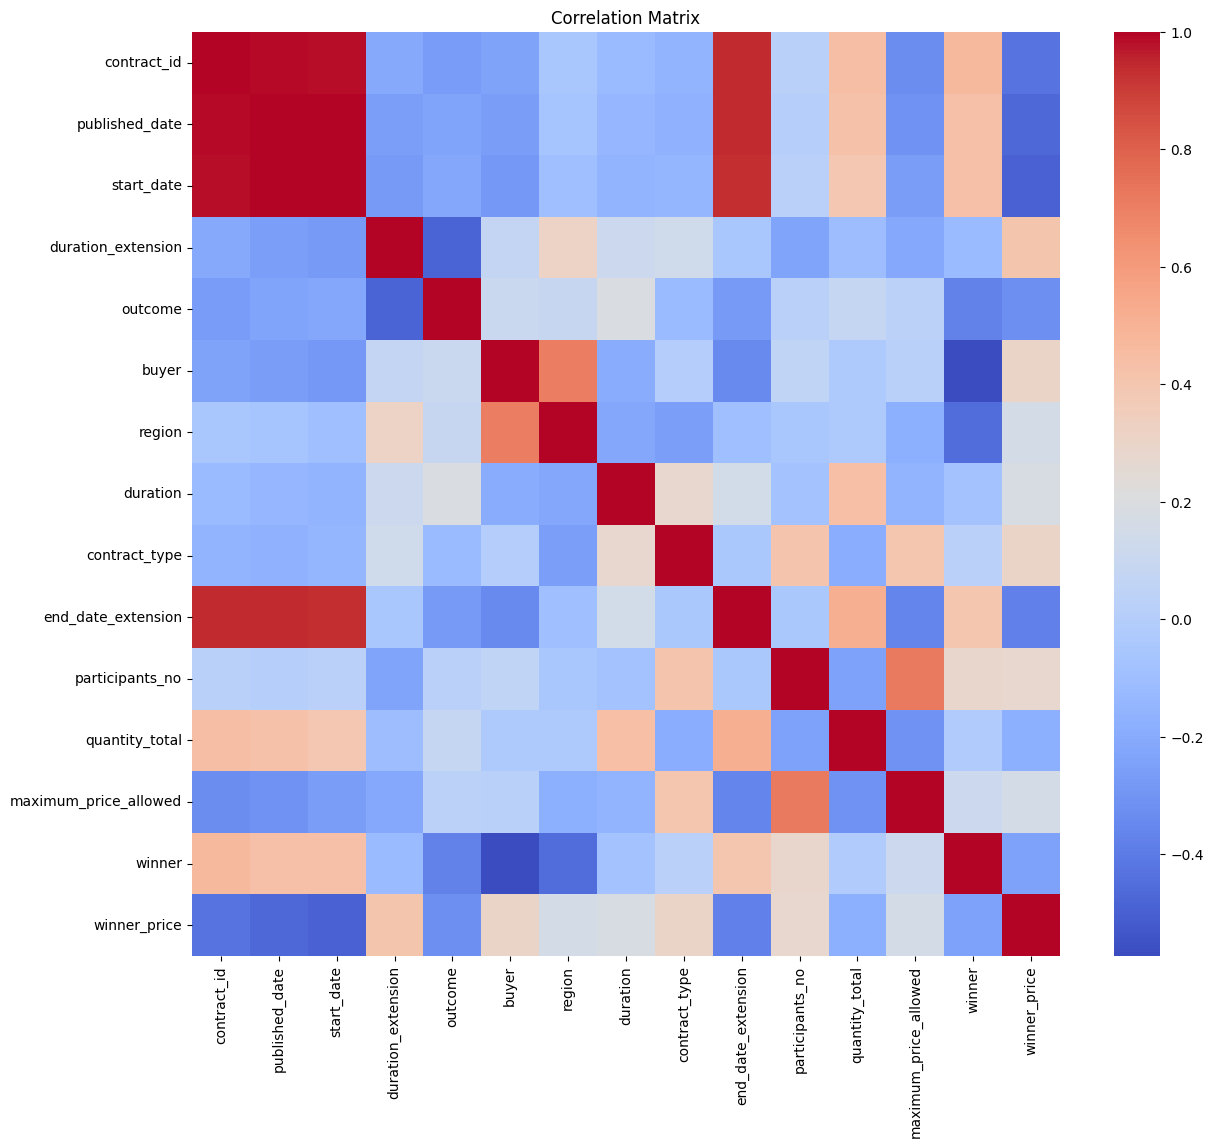

winner_price             1.000000
duration_extension       0.403939
buyer                    0.304851
contract_type            0.301616
participants_no          0.275487
duration                 0.177379
region                   0.153766
maximum_price_allowed    0.153743
quantity_total          -0.175324
winner                  -0.244375
outcome                 -0.323553
end_date_extension      -0.379099
contract_id             -0.427117
published_date          -0.470105
start_date              -0.495897
Name: winner_price, dtype: float64


In [ ]:
from sklearn.preprocessing import LabelEncoder


# Determine categorical columns dynamically
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Initialize data_encoded as a copy of data
data_encoded = data.copy()

# Label encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le
print(data_encoded.head())

# Ensure all columns are numeric
print(data_encoded.dtypes)

# Calculate correlation matrix
corr_matrix = data_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Focus on the correlation with the target variable 'winner_price'
print(corr_matrix['winner_price'].sort_values(ascending=False))


In [ ]:
data_encoded.shape

(19, 15)

**Buyer** and **region** variables are correlated, which is not unexpected as this suggests that there is some relationship between the buyers and the regions in which they operate

Exploratory Data Analysis (EDA) can be further automized in a very efficient way by using ydata profiling. This library standardizes the generation of detailed reports, complete with statistics and visualizations. In this way the Data Scientist can quicky ensure the data quality and readiness for further analysis.

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
ProfileReport(data_encoded)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Split Dataset**

In [ ]:
# Split the dataset into X & y
y = data_encoded['winner_price']
x_df = data_encoded.drop(columns='winner_price')

In [ ]:
x_df.head()

,contract_id,published_date,start_date,duration_extension,outcome,buyer,region,duration,contract_type,end_date_extension,participants_no,quantity_total,maximum_price_allowed,winner
4,3,2013-06-09,2014-08-14,6,1,8,5,12,1,2016-02-14,2,2680,0.11635,0
5,18,2019-05-26,2019-07-02,6,1,8,5,36,1,2023-01-01,2,63904,0.02200,0
6,4,2013-05-04,2013-05-17,19,1,9,6,36,1,2017-12-31,1,5900,0.03000,0
8,17,2018-05-31,2018-04-01,2,1,10,7,24,0,2020-05-31,2,66527,0.02000,0
9,6,2013-12-06,2014-02-21,14,1,11,8,48,1,2019-04-20,1,9026,0.02550,0


**Scaling the Data**

Scaling the data is a crucial step before feeding it into a machine learning model, especially for algorithms that are sensitive to the scale of input features such as linear regression, support vector machines, and neural networks.

By scaling the appropriate columns, we ensure that our model can train more effectively and produce more reliable results.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to be scaled
columns_to_scale = ['duration_extension', 'duration', 'participants_no', 'quantity_total', 'maximum_price_allowed']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
x_df[columns_to_scale] = scaler.fit_transform(x_df[columns_to_scale])

x_df.head()


,contract_id,published_date,start_date,duration_extension,outcome,buyer,region,duration,contract_type,end_date_extension,participants_no,quantity_total,maximum_price_allowed,winner
4,3,2013-06-09,2014-08-14,-0.326783,1,8,5,-1.911639,1,2016-02-14,-0.098295,-0.993192,2.287621,0
5,18,2019-05-26,2019-07-02,-0.326783,1,8,5,0.289642,1,2023-01-01,-0.098295,0.459028,-0.668731,0
6,4,2013-05-04,2013-05-17,1.390566,1,9,6,0.289642,1,2017-12-31,-1.032094,-0.916814,-0.418060,0
8,17,2018-05-31,2018-04-01,-0.855198,1,10,7,-0.810998,0,2020-05-31,-0.098295,0.521244,-0.731399,0
9,6,2013-12-06,2014-02-21,0.730047,1,11,8,1.390283,1,2019-04-20,-1.032094,-0.842666,-0.559062,0


**Split the dataset into training and testing sets for model evaluation**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80/20 split for example)
X_train, X_test, y_train, y_test = train_test_split(x_df, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (15, 14)
Testing set shape: (4, 14)


#**Summary**

#What manual tasks would you perform?

Scaling from a few SKUs to hundreds of thousands involves automating many processes, but some manual tasks and strategic oversight are still necessary to ensure the quality and success of the project. Here are the key manual tasks I would perform:

**Data Preparation and Exploration**

- Data Schema Design: Define a robust schema to handle the large-scale dataset, including types, constraints, and relationships between tables.

- Initial Data Cleaning: Perform an initial thorough data cleaning to handle missing values, outliers, and inconsistencies. This often requires domain expertise and cannot be fully automated.

- Exploratory Data Analysis (EDA): Conduct a detailed EDA to understand the data distribution, identify key patterns, and uncover potential issues. This includes visualizing data trends, checking for seasonality, and understanding correlations.

**Feature Engineering**

- Feature Selection and Creation: Manually select and create features that are likely to be relevant for the models. This involves domain knowledge to understand which features could be predictive and why.

- Domain-Specific Transformations: Implement domain-specific transformations and aggregations that might not be apparent to automated systems.
Model Development

- Model Selection: Manually select and experiment with different types of models (e.g., linear regression, decision trees, neural networks) based on the problem and data characteristics.

- Feature Importance Analysis: Manually inspect feature importance and correlations to ensure that the selected features make sense and are not introducing bias.

**Evaluation and Validation**

- Model Validation: Manually review the model validation results to ensure the model is performing well across different segments of the data. This includes checking for overfitting and underfitting.

- Hyperparameter Tuning: While hyperparameter tuning can be automated, initially setting ranges and interpreting the results requires manual intervention.

**Deployment and Monitoring**

- Deployment Strategy: Design a deployment strategy, including the architecture for model serving, rollback procedures, and versioning.

- Monitoring and Maintenance: Set up manual checks for monitoring model performance and data drift over time. Regularly review these metrics and update models as necessary.

# What automated approaches can you use?

Automating processes is crucial when scaling from a few SKUs to hundreds of thousands, especially for tasks that are repetitive, data-intensive, and require consistent execution. Here are some automated approaches we can use for different aspects of the Machine Learning modeling and exploratory data analysis (EDA) workflow:

**Data Preparation and Exploration**

*Automated Data Cleaning:*

- Missing Value Imputation
- Outlier Detection and Removal

*Automated EDA:*

- YData Profiling (example provided above)
- Sweetviz

**Feature Engineering**

*Automated Feature Engineering:*

- Feature Selection with Automated Tools: for example, SelectKBest from sklearn.feature_selection


**Model Development**

*Automated Model Training and Selection:*

- AutoML Tools: H2O.ai, AutoML, TPOT

*Hyperparameter Tuning:*

- GridSearchCV and RandomizedSearchCV

**Deployment and Monitoring**

*Automated Model Deployment:*

- CI/CD Pipelines (e.g., GitHub Actions, Jenkins)

#How would you improve this process long term and how would you build your roadmap?

**Long-term Improvements**

To improve the process long-term and ensure scalability, efficiency, and robustness, it's essential to establish a structured approach that incorporates automation, modularity, and continuous monitoring.

- Automate the Entire Pipeline: We can use workflow orchestration tools like Apache Airflow to automate data loading, preprocessing, feature engineering, model training, and evaluation.
- Schedule periodic runs to ensure the pipeline processes new data as it becomes available.
- Break down the pipeline into reusable functions for each step: data loading, cleaning, encoding, scaling, splitting, and modeling.
- Use distributed data processing frameworks like Apache Spark or Dask for large datasets.
- Maintain comprehensive documentation of the pipeline, including code comments, README files, and user guides.